In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
def _flow_velocity(p, q, r):
    return _flow_magnitude(p, r).transpose() @ _flow_direction(p, q)

In [93]:
def _flow_velocity2(p, q, r):
    return _flow_magnitude_rolled(p, r).transpose() @ _flow_direction(p, q)

In [8]:
def _flow_direction(p, q):
    return q - p

In [61]:
def _flow_magnitude(p, r):
    return 1 / (_flow_magnitude_metric(p, r) + 1)

In [89]:
def _flow_magnitude_rolled(p, r):
    m = _flow_magnitude(p, r)
    m_rolled = m
    for i in range(1, m.shape[0]):
        m_rolled *= 1 - np.roll(m, i, axis=0)
        
    return m_rolled

In [103]:
def _flow_magnitude_metric(p, r):
    return _metric_l2(p, r)

In [101]:
def _metric_l2(p, r):
    return np.linalg.norm(np.repeat(r[np.newaxis, :, :], p.shape[0], axis=0) - p[:, None, :], axis=2)

In [102]:
def _metric_l2_squared(p, r):
    return np.linalg.norm(np.repeat(r[np.newaxis, :, :], p.shape[0], axis=0) - p[:, None, :], axis=2)**2

In [63]:
r = np.array([[i, j] for i in range(5) for j in range(5)])
p = np.array([[2.2, 1.8], [0.6, 3]])
q = np.array([[3.5, 2.9], [0.5, 0.5]])

In [91]:
m = _flow_magnitude(p, r)
d = _flow_direction(p, q)
v = _flow_velocity(p, q, r)
s = r + v

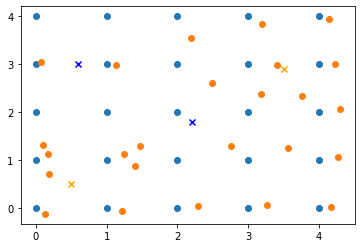

In [76]:
plt.scatter(*r.transpose())
plt.scatter(*(r+v).transpose())
plt.scatter(*p.transpose(), color='blue', marker='x')
plt.scatter(*q.transpose(), color='orange', marker='x')

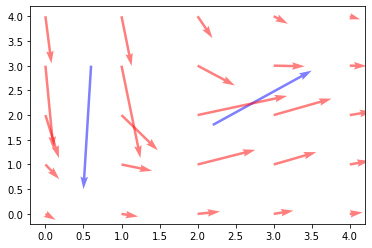

In [78]:
plt.quiver(p[:, 0], p[:, 1], q[:, 0] - p[:, 0], q[:, 1] - p[:, 1], color='blue',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)
plt.quiver(r[:, 0], r[:, 1], s[:, 0] - r[:, 0], s[:, 1] - r[:, 1], color='red',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)

In [79]:
a = np.arange(16).reshape((4,4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [88]:
a = np.arange(16).reshape((4, 4)) + 1
a = a / 16
b = a
for i in range(1,4):
    print(1 - np.roll(a, i, axis=0))
    b = b * (1 - np.roll(a, i, axis=0))
    
b

[[0.1875 0.125  0.0625 0.    ]
 [0.9375 0.875  0.8125 0.75  ]
 [0.6875 0.625  0.5625 0.5   ]
 [0.4375 0.375  0.3125 0.25  ]]
[[0.4375 0.375  0.3125 0.25  ]
 [0.1875 0.125  0.0625 0.    ]
 [0.9375 0.875  0.8125 0.75  ]
 [0.6875 0.625  0.5625 0.5   ]]
[[0.6875 0.625  0.5625 0.5   ]
 [0.4375 0.375  0.3125 0.25  ]
 [0.1875 0.125  0.0625 0.    ]
 [0.9375 0.875  0.8125 0.75  ]]


array([[0.00352478, 0.00366211, 0.00205994, 0.        ],
       [0.02403259, 0.01538086, 0.00694275, 0.        ],
       [0.06797791, 0.04272461, 0.01963806, 0.        ],
       [0.22911072, 0.17944336, 0.13389587, 0.09375   ]])

In [98]:
v2 = _flow_velocity2(p, q, r)
s = r + v2

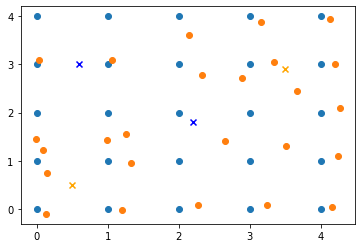

In [99]:
plt.scatter(*r.transpose())
plt.scatter(*(r+v).transpose())
plt.scatter(*p.transpose(), color='blue', marker='x')
plt.scatter(*q.transpose(), color='orange', marker='x')

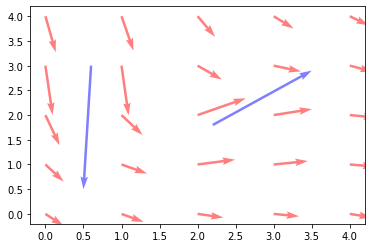

In [100]:
plt.quiver(p[:, 0], p[:, 1], q[:, 0] - p[:, 0], q[:, 1] - p[:, 1], color='blue',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)
plt.quiver(r[:, 0], r[:, 1], s[:, 0] - r[:, 0], s[:, 1] - r[:, 1], color='red',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)

In [113]:
r = np.array([[i, j] for i in np.linspace(0, 5, 10) for j in np.linspace(0, 5, 10)])
s = r + _flow_velocity2(p, q, r)

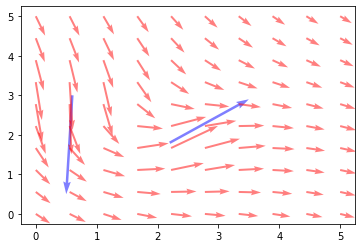

In [114]:
plt.quiver(p[:, 0], p[:, 1], q[:, 0] - p[:, 0], q[:, 1] - p[:, 1], color='blue',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)
plt.quiver(r[:, 0], r[:, 1], s[:, 0] - r[:, 0], s[:, 1] - r[:, 1], color='red',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)

In [142]:
z = np.linalg.norm(r - s, axis=1)
z = z.reshape((10, 10)).transpose()

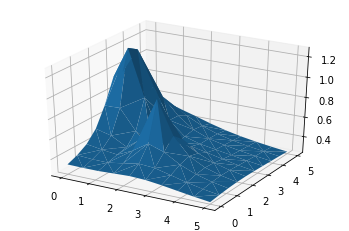

In [126]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(*r.transpose(), z)

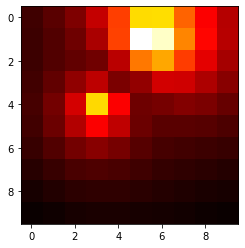

In [131]:
plt.imshow(z.reshape((10,10)), interpolation='nearest', cmap='hot')

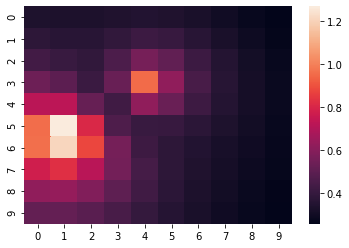

In [143]:
sns.heatmap(z)

array([0.33700294, 0.37565314, 0.4345389 , 0.53851885, 0.72254018,
       0.95704415, 0.96345348, 0.77716829, 0.62222609, 0.51511199,
       0.33463517, 0.36611108, 0.40961156, 0.49894565, 0.72733266,
       1.26906354, 1.21069891, 0.8296827 , 0.63529179, 0.51856671,
       0.33512248, 0.36409046, 0.39028453, 0.41310364, 0.52287601,
       0.8080416 , 0.87865416, 0.71892174, 0.5856694 , 0.4924655 ,
       0.34281107, 0.38950303, 0.46216935, 0.52971294, 0.42755467,
       0.46500042, 0.55977941, 0.55409413, 0.50271877, 0.44712011,
       0.34971988, 0.4180382 , 0.56431338, 0.95388186, 0.6213739 ,
       0.40837995, 0.42154015, 0.43971685, 0.42705808, 0.39885021,
       0.343633  , 0.40663569, 0.51160095, 0.62180325, 0.53320486,
       0.4061177 , 0.37583919, 0.37774689, 0.37276164, 0.35746354,
       0.32460767, 0.36750692, 0.41772149, 0.44735693, 0.42115976,
       0.37367013, 0.34907238, 0.34159871, 0.33536447, 0.32467634,
       0.30066342, 0.32738639, 0.3519849 , 0.36363615, 0.35545